#Gradient Boost   
The principle behind boosting algorithm is that first we build a model on the training dataset. Then a second model is built to rectify the errors present in the first model.This process is continued until and unless the error is minimized and the dataset is predicted correctly.   
We start with a weak model and subsequently each new model is fit on a modified version of original dataset.   
  * A weak learner is a model that performs at least slightly better than a random model.   
  * Decision trees are generally used as weak learners in gradient boost.   
  * Unlike Adaboost, where decision trees contains only one level (decision stumps), the decision tree used in gradient boost generally contains 3 - 7 levels.

##Steps   
1. make first guess for y_train and y_test using the average of y_train.   
$$
  y_{train_{p0}} = = \frac{1}{n} Σ_{i=1}^n y_{train_i}
$$
$$
  y_{test_{p0}} = y_{train_{p0}}
$$
2. Calculate the residuals from the training dataset.
$$ r_0 = y_{train} - y_{train_{p0}}
$$
3. Fit a weak learner $f_0$ to the residuals minimizing the loss function. 
$$ r_0 = f_0(X_{train}) 
$$
4. Increment the predicted y's.
$$ y_{train_{p_1}} = y_{train_{p_0}} + α F_0(X_{train}) 
$$
$$ y_{test_{p_1}} = y_{test_{p_0}} + α F_0(X_{test})
$$
where $α$ is the learning rate.
5. Repeat the steps 2 to 4 until you reach the number of boosting rounds.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate:float = 0.1):
  y_hat_train = np.repeat(np.mean(y_train), len(y_train))
  y_hat_test = np.repeat(np.mean(y_train), len(X_test))

  residuals = y_train - y_hat_train

  for i in range(boosting_rounds):
    model = model.fit(X_train, residuals)
    y_hat_train = y_hat_train + learning_rate * model.predict(X_train)
    y_hat_test = y_hat_test + learning_rate * model.predict(X_test)
    residuals = y_train - y_hat_train

  return y_hat_train, y_hat_test

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 1000,
                       n_features = 20,
                       n_informative=15,
                       n_targets=1,
                       bias=0.0,
                       noise=20,
                       shuffle=True,
                       random_state=13                       
                       )
X_train = X[0:800]
y_train = y[0:800]

X_test = X[800:]
y_test = y[800:]

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(criterion='squared_error', max_depth=3)

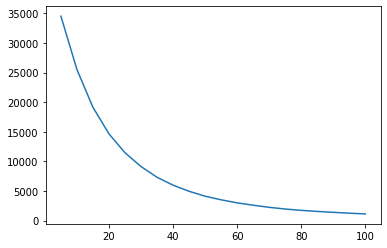

In [ ]:
mse_train = []
n_rounds = np.arange(5, 101, 5)
for n_round in n_rounds:
  y_hat_train = GradBoost(model, X_train, y_train, X_test, boosting_rounds=n_round, learning_rate=0.1)[0]

  mse_train.append(np.mean((y_train - y_hat_train) ** 2))

plt.plot(n_rounds, mse_train)